In [106]:
from pymongo import MongoClient
import pandas as pd
#import matplotlib.pyplot as plt

In [96]:
client = MongoClient('localhost', 27017)
db = client['CasosCOVID-19'] #cargo la BD a la variable db
collection = db['CasosCOVID-19']
df = pd.read_excel('D:\Cs. de Datos\Práctica Profesionalizante\Covid-19\CasosCOVID-19.xlsx')
data = df.to_dict('records') #convierto los registros en formato dict y los cargo en la vble data
collection.insert_many(data) #creo la colección, insertando lo cargado en data
print("Carga exitosa")

Carga exitosa


In [97]:
print(df)

                                                 Fecha  \
0                                  2020-03-25 00:00:00   
1                                  2020-03-26 00:00:00   
2                                  2020-03-28 00:00:00   
3                                  2020-03-29 00:00:00   
4                                  2020-03-30 00:00:00   
..                                                 ...   
931  407 Hoy 27.08.2021 se notificaron 10 casos al ...   
932  408 Hoy 28.08.2021 se notificaron 16 casos al ...   
933  409 Hoy 29.08.2021 se notificaron 6 casos al S...   
934  410 Hoy 30.08.2021 se notificaron 14 casos al ...   
935  Fuente: Elaboración propia en base a Informe d...   

     Casos registrados Ciudad de Córdoba (acumulado)  \
0                                               21.0   
1                                               22.0   
2                                               24.0   
3                                               30.0   
4                      

In [98]:
df.head()

,Fecha,Casos registrados Ciudad de Córdoba (acumulado),Casos registrados Provincia de Córdoba (acumulado),Fallecidos Provincia de Córdoba (acumulado),Nuevos casos registrados Ciudad de Córdoba,Nuevos casos registrados Provincia de Córdoba,Notas al pie
0,2020-03-25 00:00:00,21.0,49.0,0.0,NaN,NaN,-
1,2020-03-26 00:00:00,22.0,52.0,0.0,1,3,-
2,2020-03-28 00:00:00,24.0,56.0,0.0,2,4,-
3,2020-03-29 00:00:00,30.0,73.0,0.0,6,17,-
4,2020-03-30 00:00:00,30.0,80.0,0.0,0,7,-


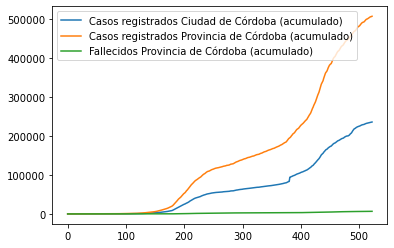

In [99]:
df.plot()

In [100]:
df.columns

Index(['Fecha', 'Casos registrados Ciudad de Córdoba (acumulado)',
       'Casos registrados Provincia de Córdoba (acumulado)',
       'Fallecidos Provincia de Córdoba (acumulado)',
       'Nuevos casos registrados Ciudad de Córdoba',
       'Nuevos casos registrados Provincia de Córdoba', 'Notas al pie'],
      dtype='object')

In [101]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Fecha                                               935 non-null    object 
 1   Casos registrados Ciudad de Córdoba (acumulado)     523 non-null    float64
 2   Casos registrados Provincia de Córdoba (acumulado)  523 non-null    float64
 3   Fallecidos Provincia de Córdoba (acumulado)         523 non-null    float64
 4   Nuevos casos registrados Ciudad de Córdoba          522 non-null    object 
 5   Nuevos casos registrados Provincia de Córdoba       522 non-null    object 
 6   Notas al pie                                        523 non-null    object 
dtypes: float64(3), object(4)
memory usage: 51.3+ KB
None


In [102]:
collection.count()

<ipython-input-102-7c4bc5758cb0>:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  collection.count()


936

In [103]:
df.describe()

,Casos registrados Ciudad de Córdoba (acumulado),Casos registrados Provincia de Córdoba (acumulado),Fallecidos Provincia de Córdoba (acumulado)
count,523.000000,523.000000,523.000000
mean,67234.321224,147095.239006,2150.439771
std,70887.425993,154812.608004,2034.191213
min,21.000000,49.000000,0.000000
25%,1176.000000,2635.000000,50.500000
50%,55752.000000,119513.000000,2259.000000
75%,100914.500000,213650.500000,3236.000000
max,235556.000000,506604.000000,6648.000000


Este archivo de excel tiene registros de "Notas al pie", que si los eliminamos, no hace el gráfico, por eso cuenta registros de más.

In [104]:
#Cerramos la conexión
client.close()

In [108]:
#Hacemos la conexión con el excel sin las "Notas al pie", que nos devuelve los registros reales que existen en la BD
#pero no podemos graficar
client = MongoClient('localhost', 27017)
db = client['CasosCOVID-19bis'] #cargamos la BD a la variable db
collection = db['CasosCOVID-19bis'] #creamos la colección
df = pd.read_excel('D:\Cs. de Datos\Práctica Profesionalizante\Covid-19\CasosCOVID-19bis.xlsx')
data = df.to_dict('records') #conviertimos los registros en formato dict y los cargamos en la vble data
collection.insert_many(data) #creamos la colección, insertando lo cargado en data
print("Carga exitosa")

Carga exitosa


In [109]:
print(df)

         Fecha  Casos registrados Ciudad de Córdoba (acumulado)  \
0   2020-03-25                                               21   
1   2020-03-26                                               22   
2   2020-03-28                                               24   
3   2020-03-29                                               30   
4   2020-03-30                                               30   
..         ...                                              ...   
518 2021-08-26                                           234354   
519 2021-08-27                                           234748   
520 2021-08-28                                           235035   
521 2021-08-29                                           235120   
522 2021-08-30                                           235556   

     Casos registrados Provincia de Córdoba (acumulado)  \
0                                                   49    
1                                                   52    
2                 

In [110]:
df.head()

,Fecha,Casos registrados Ciudad de Córdoba (acumulado),Casos registrados Provincia de Córdoba (acumulado),Fallecidos Provincia de Córdoba (acumulado),Nuevos casos registrados Ciudad de Córdoba,Nuevos casos registrados Provincia de Córdoba,Fallecidos por día Provincia de Córdoba
0,2020-03-25,21,49,0,NaN,NaN,0
1,2020-03-26,22,52,0,1,3,0
2,2020-03-28,24,56,0,2,4,0
3,2020-03-29,30,73,0,6,17,0
4,2020-03-30,30,80,0,0,7,0


In [111]:
collection.count()

<ipython-input-111-7c4bc5758cb0>:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  collection.count()


523

In [112]:
df.describe()

,Casos registrados Ciudad de Córdoba (acumulado),Casos registrados Provincia de Córdoba (acumulado),Fallecidos Provincia de Córdoba (acumulado),Fallecidos por día Provincia de Córdoba
count,523.000000,523.000000,523.000000,523.000000
mean,67234.321224,147095.239006,2150.439771,12.619503
std,70887.425993,154812.608004,2034.191213,15.246084
min,21.000000,49.000000,0.000000,0.000000
25%,1176.000000,2635.000000,50.500000,1.000000
50%,55752.000000,119513.000000,2259.000000,7.000000
75%,100914.500000,213650.500000,3236.000000,20.000000
max,235556.000000,506604.000000,6648.000000,95.000000


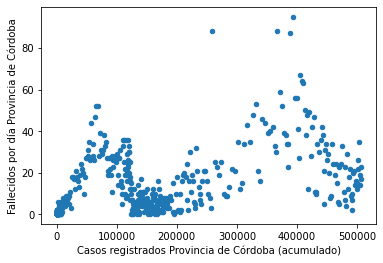

In [143]:
df.plot.scatter('Casos registrados Provincia de Córdoba (acumulado)', 'Fallecidos por día Provincia de Córdoba')
#diagrama de dispersión

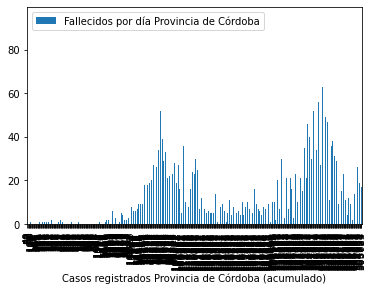

In [144]:
df.plot.bar('Casos registrados Provincia de Córdoba (acumulado)', 'Fallecidos por día Provincia de Córdoba')
#diagrama de barra

In [137]:
client.close()